# Report 3

### by Kaitlyn Keil and Kevin Zhang
### April 2017

<a href = http://tna.europarchive.org/20110116113217/http:/www.food.gov.uk/science/dietarysurveys/dietsurveys/>UK Food Network Dataset</a>

http://tna.europarchive.org/20110116113217/http://www.food.gov.uk/multimedia/pdfs/cofuserdoc.pdf

In [1]:
""" This file contains code used to analyze the
UK Food Nutrient Database, the information for which can be found
at this link: http://tna.europarchive.org/20110116113217/http:/www.food.gov.uk/science/dietarysurveys/dietsurveys/

The following packages are required to run this code.
"""

from __future__ import print_function, division
import pandas as pd

import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
%matplotlib inline
import seaborn as sns

from collections import defaultdict, Counter
import statsmodels.formula.api as smf

In [2]:
def ReadProximates():
    df = pd.read_excel('dietary.xls', sheetname='Proximates')
    column_list = ['Water (g)', 'Protein (g)', 'Fat (g)', 'Carbohydrate (g)', 'Total sugars (g)']
    
    df['Water'] = pd.to_numeric(df['Water (g)'], errors='coerce')
    df['Protein'] = pd.to_numeric(df['Protein (g)'], errors='coerce')
    df['Fat'] = pd.to_numeric(df['Fat (g)'], errors='coerce')
    df['Carbohydrate'] = pd.to_numeric(df['Carbohydrate (g)'], errors='coerce')
    df['Sugars'] = pd.to_numeric(df['Total sugars (g)'], errors='coerce')
    
    df['Water'].replace([np.nan], 0, inplace=True)
    df['Protein'].replace([np.nan], 0, inplace=True)
    df['Fat'].replace([np.nan], 0, inplace=True)
    df['Carbohydrate'].replace([np.nan], 0, inplace=True)
    df['Sugars'].replace([np.nan], 0, inplace=True)
    
    
#     for column in column_list:
#         new_name = column[:-4]
#         df[new_name]= df[column]
#         for key, value in df[column].items():
#             if isinstance(value, str):
#                 if '(' in value:
#                     df[new_name][key] = float(value[1:-1])
#                 elif value=='Tr':
#                     df[new_name][key] = 0.0
#                 elif value=='N':
#                     df[new_name][key] = 0.0
#                 elif math.isnan(float(value)):
#                     df[new_name][key] = 0.0
#                     print('NaN found')
#                 else:
#                     df[new_name][key] = float(value)
        
    return df

In [3]:
#tester = pd.read_excel('dietary.xls', sheetname='Proximates')
# tester = ReadProximates()
# TO DO
# For cleaning: 
#  Get rid of Ns and Trs <- Done!
#  Figure out how to deal with parentheses <- Done!
#  Convert rows into floats (.astype) <- Done!
#  Get ready for lots of brackets...
#  Potentially just make different columns for the integer values <- ...done?

# For report:
#  Figure out if we can actually classify based on these values
#  Make a dictionary mapping from the Group codes to actual names
#  Figure out a good model
#  Do the thing
#  PCA to figure out the components we will want to look at
#  Unclassified ML to figure out natural groups?


In [4]:
tester = ReadProximates()

In [5]:
from sklearn.cluster import KMeans
#['Water (g)', 'Protein (g)', 'Fat (g)', 'Carbohydrate (g)', 'Total sugars (g)']
water = pd.Series(tester.Water, name='Water')
protein = pd.Series(tester.Protein, name='Protein')
fat = pd.Series(tester.Fat, name='Fat')
carbs = pd.Series(tester.Carbohydrate, name='Carbs')
sugars = pd.Series(tester['Sugars'], name='Sugars')
X = pd.concat([water,protein,fat,carbs,sugars], axis=1)
X.fillna(0)
kmeans = KMeans(n_clusters=15, random_state=0)
kmeans.fit(X.dropna())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
# Try log or logit scale
# pairwise, maybe look at PCA

In [7]:
x_vals = 'Protein'
y_vals = 'Carbohydrate'
z_vals = 'Fat'

food_group_dict = {'A':['Cereals','peru'], 'B':['Dairy','beige'], 'C':['Egg','paleturquoise'],
                  'D':['Vegetable','darkolivegreen'], 'F':['Fruit','firebrick'], 'G':['Nuts','saddlebrown'],
                  'J':['Fish','slategray'],'M':['Meat','indianred'], 'O':['Fat','khaki']}

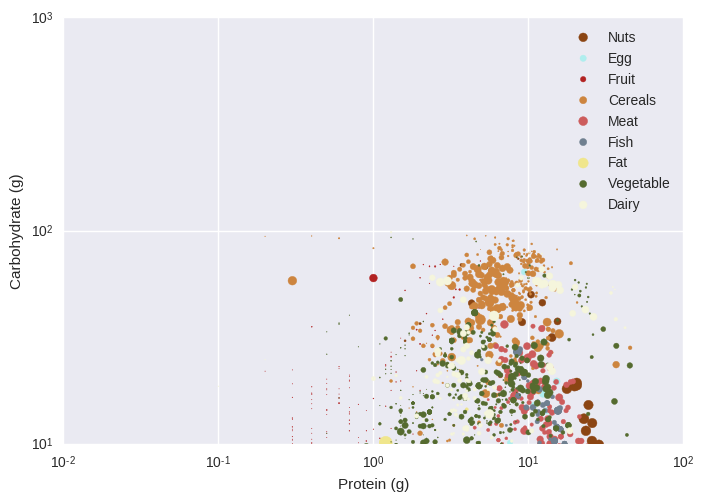

In [8]:
ax = plt.subplot(111)
for key,val in food_group_dict.items():
    df = tester[tester.Group.str.startswith(key, na=False)]
    ax.scatter(df[x_vals],df[y_vals],df[z_vals],color=val[1],label = val[0])
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel(x_vals+' (g)')  
ax.set_ylabel(y_vals+' (g)')
#ax.set_zlabel(z_vals+' (g)')
ax.legend()

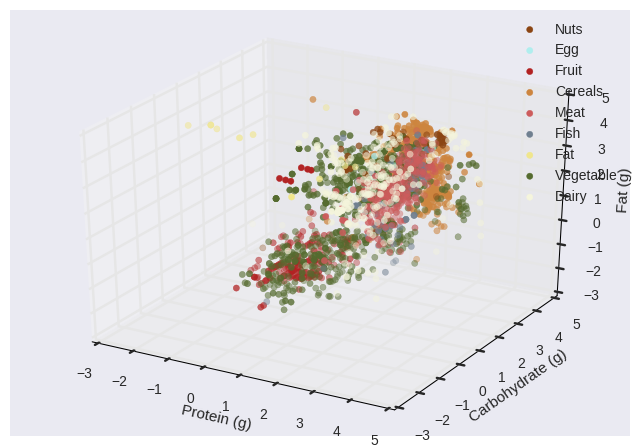

In [9]:
from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
#ax.scatter3D(tester[x_vals], tester[y_vals], tester[z_vals])

for key,val in food_group_dict.items():
    df = tester[tester.Group.str.startswith(key, na=False)]
    ax.scatter3D(np.log(df[x_vals]),np.log(df[y_vals]),np.log(df[z_vals]),color=val[1],label = val[0])
#plt.xscale('log')
#plt.yscale('log')
ax.set_xlabel(x_vals+' (g)')  
ax.set_ylabel(y_vals+' (g)')
ax.set_zlabel(z_vals+' (g)')
ax.legend()

In [10]:
def ThreeDPlot(pred_cat, actual_cat, ax, actual_label, colors = ['firebrick', 'peru']):
    ax.scatter3D(np.log(pred_cat.Protein),np.log(pred_cat.Carbs), np.log(pred_cat.Fat), c = colors[0], label = 'Predicted Group')
    ax.scatter3D(np.log(actual_cat.Protein),np.log(actual_cat.Carbohydrate), np.log(actual_cat.Fat), c = colors[1], label = actual_label, alpha= .5)
    ax.view_init(elev=10, azim=135)
    
    ax.set_xlabel('Protein (log g)')
    ax.set_ylabel('Carbohydrate (log g)')
    ax.set_zlabel('Fat (log g)')
    plt.legend()

In [11]:
cereals = tester[tester.Group.str.startswith('A', na=False)]
cereals['Label'] = cereals.Water*0+3

fruits = tester[tester.Group.str.startswith('F', na=False)]
fruits['Label'] = fruits.Water*0+5

veggies = tester[tester.Group.str.startswith('D', na=False)]
veggies['Label'] = veggies.Water*0+0

dairy = tester[tester.Group.str.startswith('B', na=False)]
dairy['Label'] = dairy.Water*0+2

oils = tester[tester.Group.str.startswith('O', na=False)]
oils['Label'] = oils.Water*0+4

m1 = tester[tester.Group.str.startswith('J', na=False)]
m2 = tester[tester.Group.str.startswith('M', na=False)]
meats = pd.concat([m1,m2])
meats['Label'] = meats.Water*0+1

all_these = pd.concat([cereals, fruits, veggies, dairy, oils, meats])


/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

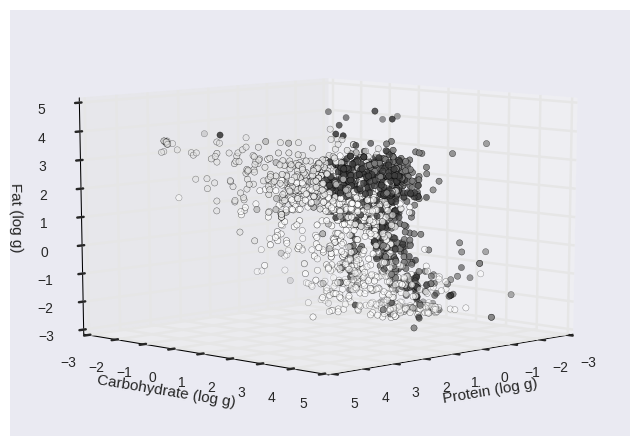

In [12]:
from sklearn.cluster import KMeans
#['Water (g)', 'Protein (g)', 'Fat (g)', 'Carbohydrate (g)', 'Total sugars (g)']
water = pd.Series(all_these.Water, name='Water')
protein = pd.Series(all_these.Protein, name='Protein')
fat = pd.Series(all_these.Fat, name='Fat')
carbs = pd.Series(all_these.Carbohydrate, name='Carbs')
sugars = pd.Series(all_these['Sugars'], name='Sugars')
X = pd.concat([water, protein,fat,carbs,sugars], axis=1)
#X = pd.concat([protein,fat,carbs], axis=1)
X.fillna(0)
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X.dropna())
y_kmeans = kmeans.predict(X)

ax = plt.subplot(projection='3d')

ax.scatter3D(np.log(X.Protein),np.log(X.Carbs), np.log(X.Fat), c = y_kmeans)
ax.view_init(elev=10, azim=45)
    
ax.set_xlabel('Protein (log g)')
ax.set_ylabel('Carbohydrate (log g)')
ax.set_zlabel('Fat (log g)')

In [13]:
predicted_labels = pd.DataFrame(y_kmeans).astype(float)
X['predictions'] = predicted_labels

In [14]:
labeled0 = X[X.predictions == 0]
labeled1 = X[X.predictions == 1]
labeled2 = X[X.predictions == 2]
labeled3 = X[X.predictions == 3]
labeled4 = X[X.predictions == 4]
labeled5 = X[X.predictions == 5]

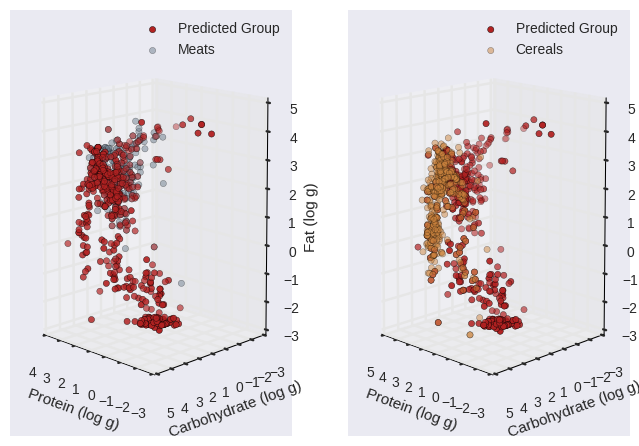

In [15]:
ax0 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled0, meats, ax0, 'Meats', ['firebrick','slategray'])

ax1 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled0, cereals, ax1, 'Cereals', ['firebrick','peru'])

plt.legend()

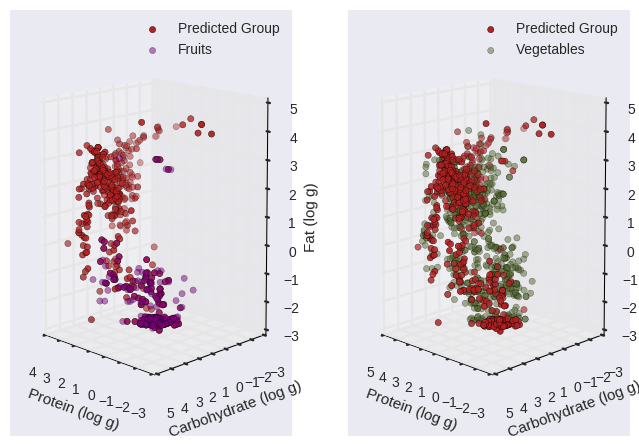

In [16]:
ax2 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled0, fruits, ax2, 'Fruits', ['firebrick','purple'])

ax3 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled0, veggies, ax3, 'Vegetables', ['firebrick','darkolivegreen'])
plt.legend()

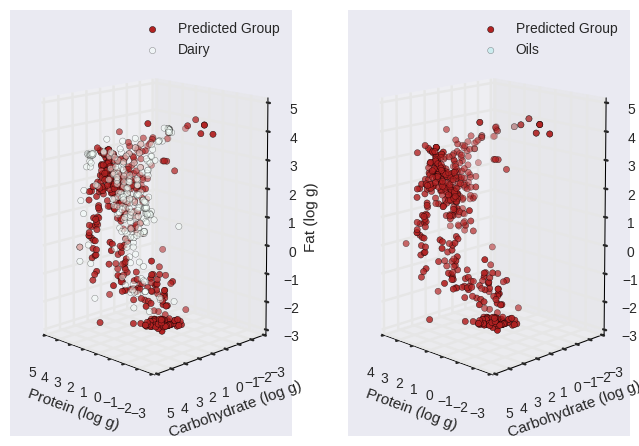

In [17]:
ax4 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled0, dairy, ax4, 'Dairy', ['firebrick','mintcream'])

ax5 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled0, oils, ax5, 'Oils', ['firebrick','paleturquoise'])
plt.legend()

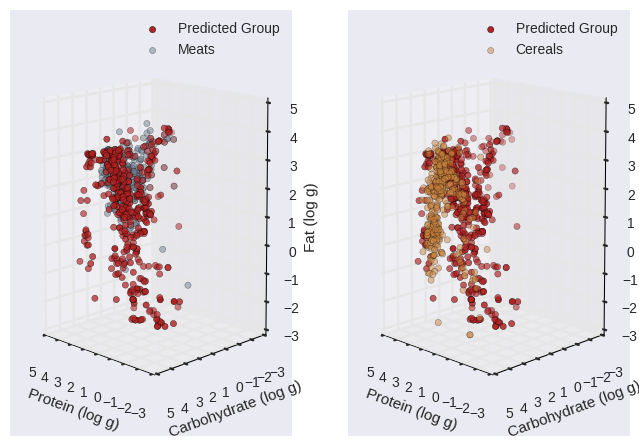

In [18]:
ax0 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled1, meats, ax0, 'Meats', ['firebrick','slategray'])

ax1 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled1, cereals, ax1, 'Cereals', ['firebrick','peru'])

plt.legend()

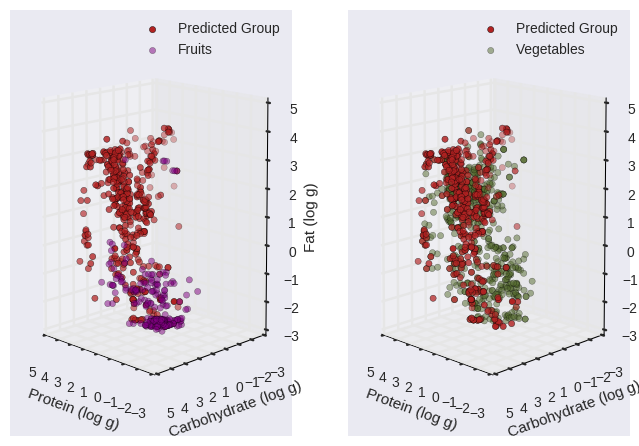

In [19]:
ax2 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled1, fruits, ax2, 'Fruits', ['firebrick','purple'])

ax3 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled1, veggies, ax3, 'Vegetables', ['firebrick','darkolivegreen'])
plt.legend()

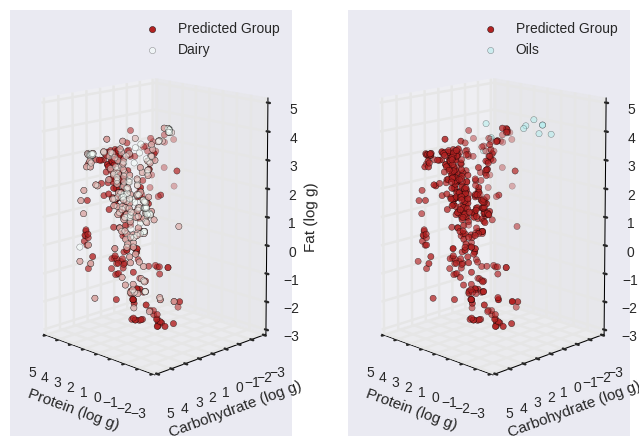

In [20]:
ax4 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled1, dairy, ax4, 'Dairy', ['firebrick','mintcream'])

ax5 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled1, oils, ax5, 'Oils', ['firebrick','paleturquoise'])
plt.legend()

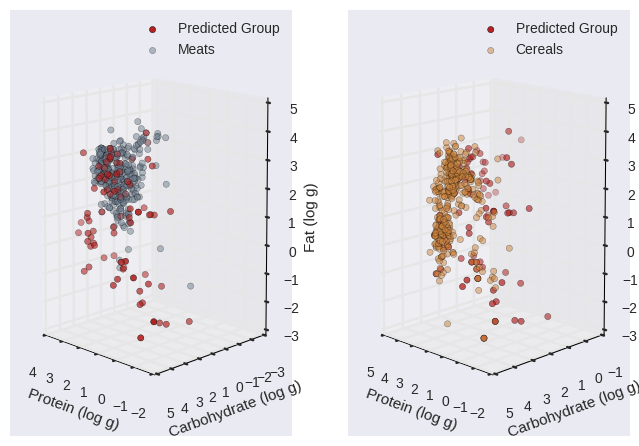

In [21]:
ax0 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled2, meats, ax0, 'Meats', ['firebrick','slategray'])

ax1 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled2, cereals, ax1, 'Cereals', ['firebrick','peru'])

plt.legend()

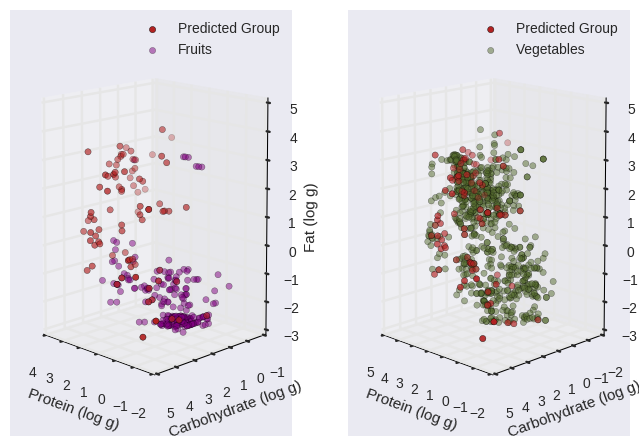

In [22]:
ax2 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled2, fruits, ax2, 'Fruits', ['firebrick','purple'])

ax3 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled2, veggies, ax3, 'Vegetables', ['firebrick','darkolivegreen'])
plt.legend()

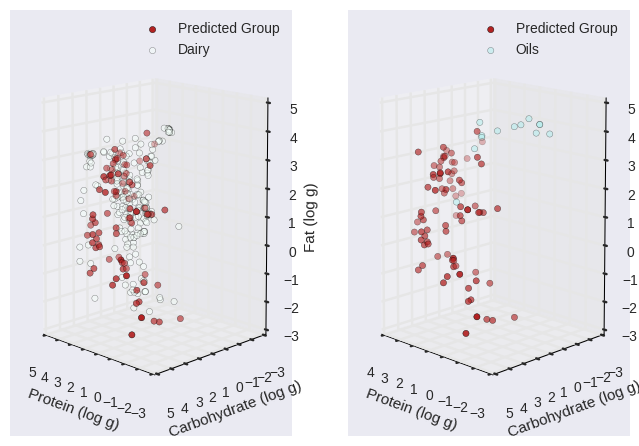

In [23]:
ax4 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled2, dairy, ax4, 'Dairy', ['firebrick','mintcream'])

ax5 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled2, oils, ax5, 'Oils', ['firebrick','paleturquoise'])
plt.legend()

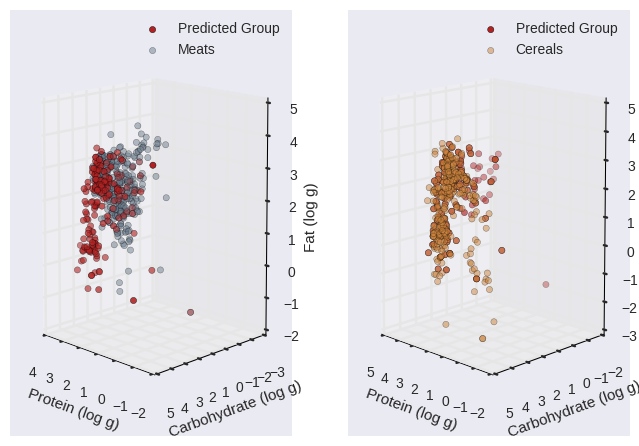

In [24]:
ax0 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled3, meats, ax0, 'Meats', ['firebrick','slategray'])

ax1 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled3, cereals, ax1, 'Cereals', ['firebrick','peru'])

plt.legend()

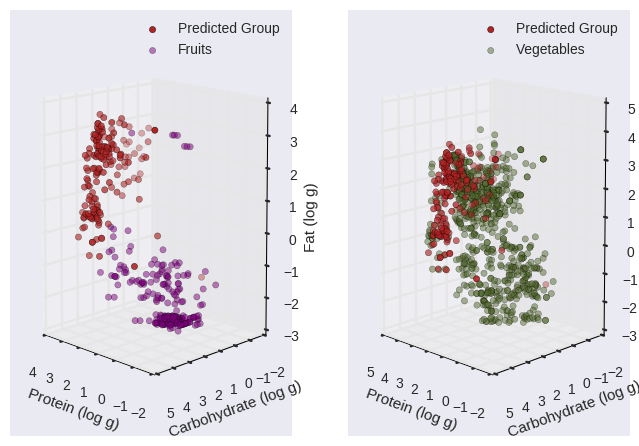

In [25]:
ax2 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled3, fruits, ax2, 'Fruits', ['firebrick','purple'])

ax3 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled3, veggies, ax3, 'Vegetables', ['firebrick','darkolivegreen'])
plt.legend()

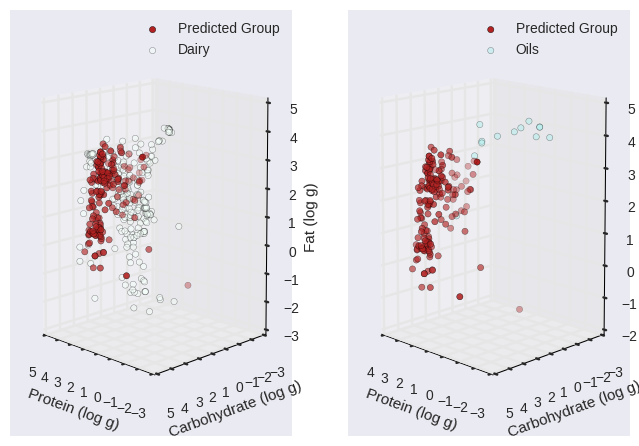

In [26]:
ax4 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled3, dairy, ax4, 'Dairy', ['firebrick','mintcream'])

ax5 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled3, oils, ax5, 'Oils', ['firebrick','paleturquoise'])
plt.legend()

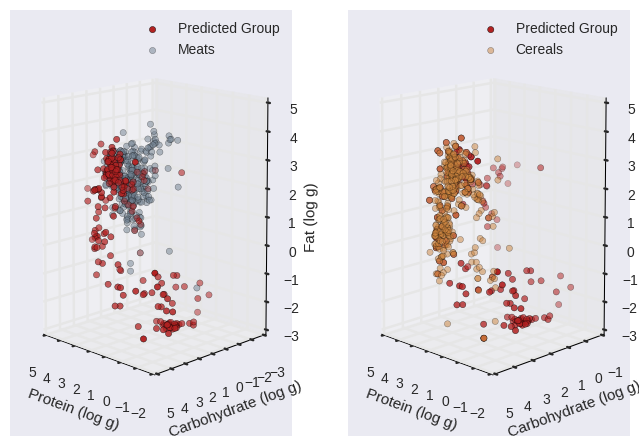

In [27]:
ax0 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled4, meats, ax0, 'Meats', ['firebrick','slategray'])

ax1 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled4, cereals, ax1, 'Cereals', ['firebrick','peru'])

plt.legend()

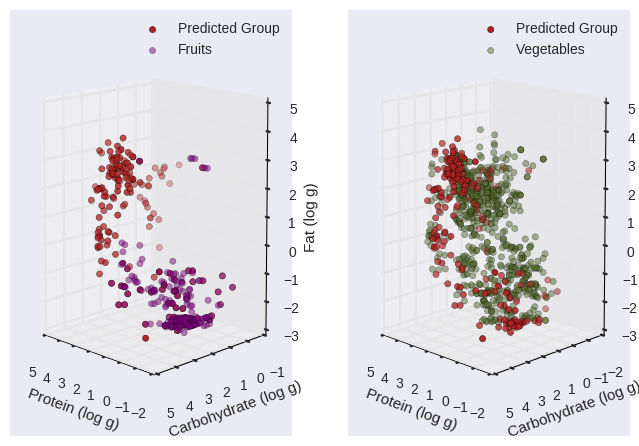

In [28]:
ax2 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled4, fruits, ax2, 'Fruits', ['firebrick','purple'])

ax3 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled4, veggies, ax3, 'Vegetables', ['firebrick','darkolivegreen'])
plt.legend()

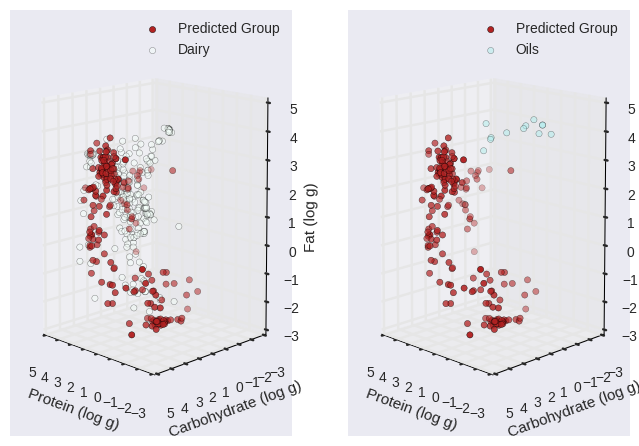

In [29]:
ax4 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled4, dairy, ax4, 'Dairy', ['firebrick','mintcream'])

ax5 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled4, oils, ax5, 'Oils', ['firebrick','paleturquoise'])
plt.legend()

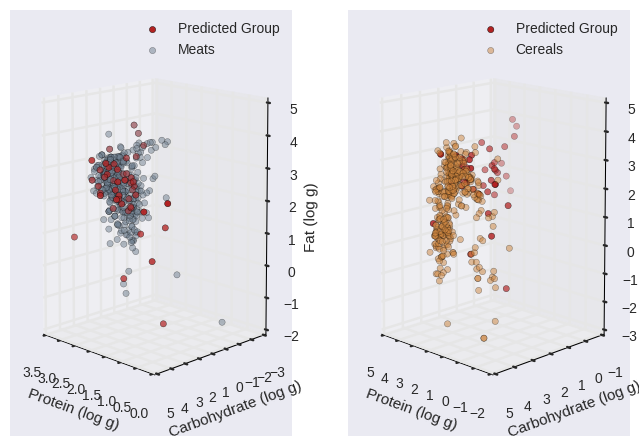

In [30]:
ax0 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled5, meats, ax0, 'Meats', ['firebrick','slategray'])

ax1 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled5, cereals, ax1, 'Cereals', ['firebrick','peru'])

plt.legend()

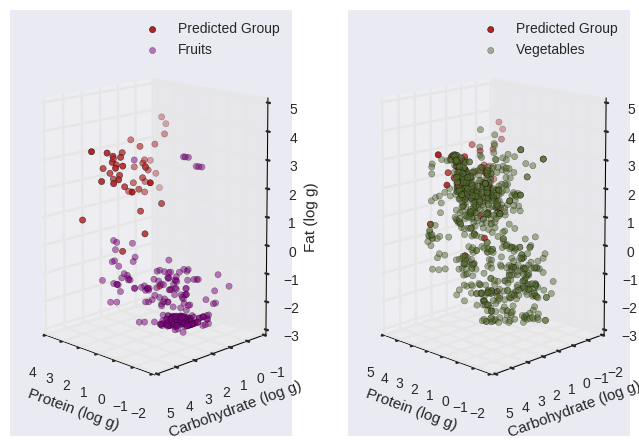

In [31]:
ax2 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled5, fruits, ax2, 'Fruits', ['firebrick','purple'])

ax3 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled5, veggies, ax3, 'Vegetables', ['firebrick','darkolivegreen'])
plt.legend()

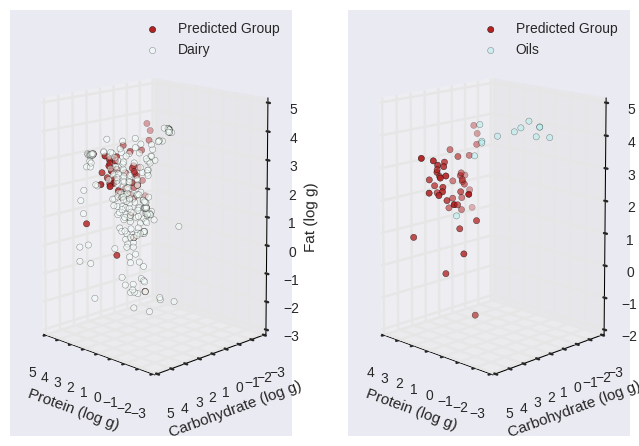

In [32]:
ax4 = plt.subplot(121, projection='3d')
ThreeDPlot(labeled5, dairy, ax4, 'Dairy', ['firebrick','mintcream'])

ax5 = plt.subplot(122, projection='3d')
ThreeDPlot(labeled5, oils, ax5, 'Oils', ['firebrick','paleturquoise'])
plt.legend()

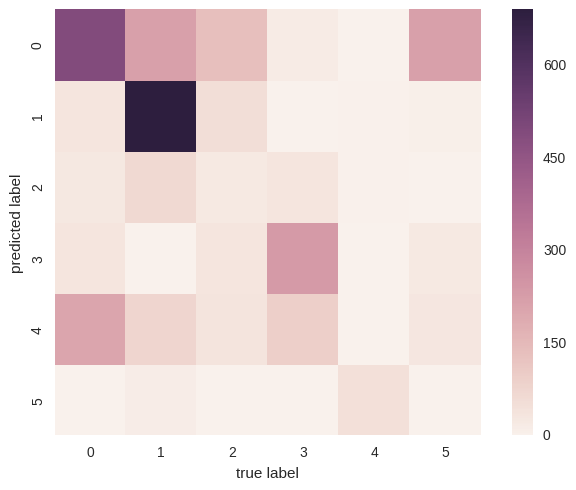

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(all_these.Label, predicted_labels)
sns.heatmap(mat.T, square=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [34]:
all_these['guess'] = predicted_labels
all_these['correct_guess'] = np.where((all_these.Label == all_these.guess), True, False)
len(all_these)

2852

In [35]:
guessed_correctly = all_these[all_these.correct_guess == True]
guessed_correctly

,Food Code,Food Name,Description,Group,Constant,Previous,Comments,Description Footnote,Water (g),Total nitrogen (g),...,Trans FAs /100g food (g),Cholesterol (mg),Water,Protein,Fat,Carbohydrate,Sugars,Label,guess,correct_guess
140,11-636,"Biscuits, homemade, rubbing-in method",Recipe,AM,11175.0,11-175,"Recipe as CCP 11-175, homemade biscuits, rubbi...",NaN,9.2,1.10,...,1.77,46.1,9.2,6.4,23.6,61.6,21.4,3.0,3.0,True
141,11-523,Shortbread,4 Samples,AM,71.0,11-185 50-106,"LGC, Nutritional analysis of foods for pre-sch...",NaN,3.3,1.05,...,N,(74.0),3.3,6.0,27.5,63.3,15.7,3.0,3.0,True
142,11-520,"Crunch biscuits, cream filled","5 samples, 2 brands of crunch creams",AM,11408.0,11-408,"Data as MW6 11-520 and FA supplement 11-408, s...",NaN,2.4,0.91,...,0.89,3.0,2.4,5.2,24.6,67.9,41.1,3.0,3.0,True
143,11-521,Semi-sweet biscuits,"10 samples, 3 brands including Osborne, Rich T...",AM,69.0,11-183 50-104 11-381,"Data as MW5 50-104, Fats as FA Supplement 11-3...",NaN,2.5,1.18,...,0.80,(31.0),2.5,6.7,13.3,74.8,22.3,3.0,3.0,True
144,11-519,"Sandwich biscuits, cream filled","20 samples, 5 brands including custard creams ...",AM,68.0,11-380 50-103 11-182,"Data from MW6, LGC, Nutritional analysis of fo...",NaN,1.7,1.04,...,2.00,(51.0),1.7,5.9,20.7,72.5,35.2,3.0,3.0,True
146,11-522,Short sweet biscuits,"10 samples, 2 brands including Lincoln and Sho...",AM,70.0,11-184 11-382 50-105,"Data from MW5 as 50-105, and FA as 11-382 ,vit...",NaN,2.6,1.08,...,0.90,(37.0),2.6,6.2,21.8,62.2,24.1,3.0,3.0,True
147,11-518,"Oatcakes, retail","6 packets, 4 brands, Fats analysed on 3 brands",AM,67.0,11-181 50-102 11-379,Data as MW5 50-102 and FA Supplement 11-379,NaN,5.5,1.71,...,0.37,(51.0),5.5,10.0,15.1,63.0,3.1,3.0,3.0,True
148,11-524,"Wafer biscuits, filled","9 packets, assorted",AM,72.0,11-186 50-107,Data as MW5 with fats and vitamin E from Milk ...,NaN,2.3,0.82,...,0.40,N,2.3,4.7,30.1,66.0,44.7,3.0,3.0,True
149,11-571,Flapjacks,Recipe,AM,11171.0,11-171 50-098,MW6 recipe,NaN,6.6,0.83,...,N,0.6,6.6,4.8,27.0,62.4,34.5,3.0,3.0,True
150,11-572,Wholemeal crackers,Recipe,AM,11188.0,11-188 50-108,"As MW6, fibre fractions from CCP 11-188",NaN,4.4,1.76,...,N,0.2,4.4,10.1,11.5,72.0,1.6,3.0,3.0,True


In [36]:
guessed_wrong = all_these[all_these.correct_guess==False]
guessed_wrong

,Food Code,Food Name,Description,Group,Constant,Previous,Comments,Description Footnote,Water (g),Total nitrogen (g),...,Trans FAs /100g food (g),Cholesterol (mg),Water,Protein,Fat,Carbohydrate,Sugars,Label,guess,correct_guess
145,11-639,"Oatcakes, homemade",Recipe,AM,11180.0,11-180,Recipe as CCP 11-179,NaN,9.6,1.83,...,0.00,10.0,9.6,10.7,18.1,62.7,0.0,3.0,4.0,False
151,11-625,"Gingernut biscuits, homemade",recipe,AM,11173.0,11-173,Recipe as CCP 11-173,NaN,6.1,0.76,...,1.55,0.5,6.1,4.4,19.7,67.8,32.7,3.0,4.0,False
153,11-637,"Biscuits, homemade, wholemeal",Recipe,AM,11176.0,11-176,Recipe as CCP 11-176,NaN,8.8,2.29,...,0.59,24.1,8.8,13.5,8.9,60.7,4.7,3.0,4.0,False
157,11-634,"Brandy snaps, home made",Recipe,AM,11165.0,11-165,Recipe as CCP 11-165,NaN,3.9,0.49,...,0.77,57.4,3.9,2.9,22.5,71.2,50.3,3.0,4.0,False
160,11-516,"Sandwich biscuits, jam filled","6 samples, 3 brands including Jammy Dodgers an...",AM,11414.0,11-414,Data as MW6 and FA Supplement 11-414 source LG...,NaN,4.4,0.98,...,1.32,N,4.4,5.6,17.3,69.5,29.1,3.0,4.0,False
166,11-413,"Oat based biscuits, chocolate, half coated","20 samples, 4 brands including Hob Nobs,\nBarn...",AM,11413.0,47,"This data is from fatty acids supplement only,...",NaN,NaN,NaN,...,1.21,NaN,0.0,0.0,23.8,0.0,0.0,3.0,4.0,False
183,11-465,"Pitta bread, white","10 samples, 8 brands",AF,5002.0,11-090 50-045,"LGC, Nutrient analysis of bread and morning go...",NaN,31.4,1.60,...,Tr,0.0,31.4,9.1,1.3,55.1,3.0,3.0,4.0,False
191,11-627,"Bannocks, made with beremeal",Recipe,AF,11066.0,11-066,Recipe as CCP 11-066,NaN,26.5,1.59,...,N,0.8,26.5,9.4,1.6,55.9,3.3,3.0,2.0,False
192,11-628,"Bannocks, made with wheat flour",Recipe,AF,11067.0,11-067,Recipe as CCP 11-067,NaN,27.5,1.50,...,NaN,0.8,27.5,8.7,1.2,63.0,3.1,3.0,2.0,False
193,11-629,Milk bread,Recipe,AF,11085.0,11-085,As recipe CCP 11-085,NaN,34.1,1.51,...,0.56,5.5,34.1,8.7,8.7,47.9,2.6,3.0,2.0,False
